![school](dom-fou-YRMWVcdyhmI-unsplash.jpg)

# Initial Regression Model
### Normalizing and formatting data appropriately
For the categorical varaibles, as discovered in my EDA notebook, I'll create dummy values.

In [1]:
#import the appropriate tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.figure_factory import create_scatterplotmatrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
#import the data
df = pd.read_csv('test_scores 2.csv')
#fix dtypes
for column in df.columns:
    print(column,':',df[column].dtypes)

school : object
school_setting : object
school_type : object
classroom : object
teaching_method : object
n_student : float64
student_id : object
gender : object
lunch : object
pretest : float64
posttest : float64


In [3]:
#create dummies for categorical variables
cols_to_fix = ['school_type','teaching_method','gender','lunch','school','school_setting','classroom']
dummies = pd.DataFrame()
for item in cols_to_fix:
    new = pd.get_dummies(df[item],prefix=item,drop_first=True)
    dummies = pd.concat([dummies,new],axis=1)

In [4]:
#drop og columns
df.drop(cols_to_fix,axis=1,inplace=True)
df = df.drop(['student_id'],axis=1)

In [5]:
#attach leftover og to dummies
df = pd.concat([df,dummies],axis=1)
#fix spaces in lunch column name
df=df.rename(columns={"lunch_Qualifies for reduced/free lunch": "free_lunch"})
df.head()

,n_student,pretest,posttest,school_type_Public,teaching_method_Standard,gender_Male,free_lunch,school_CCAAW,school_CIMBB,school_CUQAM,...,classroom_XJ8,classroom_XXE,classroom_XXJ,classroom_XZ4,classroom_XZM,classroom_YTB,classroom_YUC,classroom_ZBH,classroom_ZDT,classroom_ZNS
0,20.0,62.0,72.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20.0,66.0,79.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20.0,64.0,76.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20.0,61.0,77.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20.0,64.0,76.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


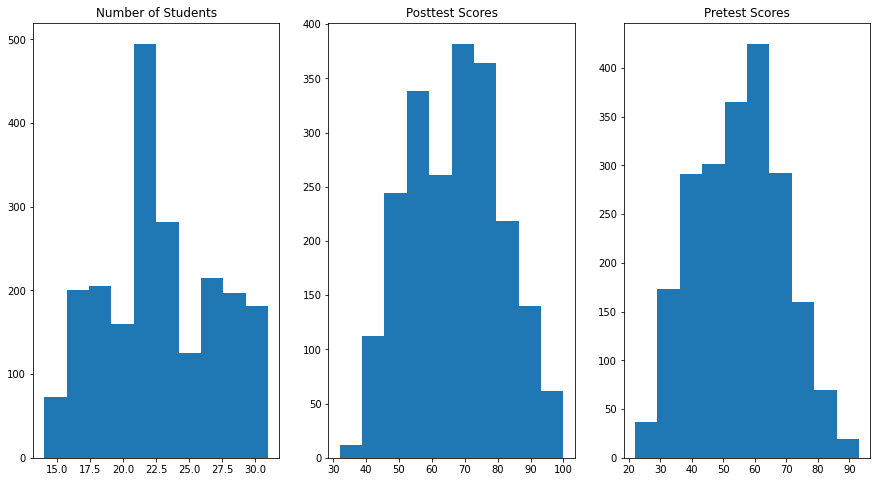

In [6]:
#plot the distribution of the numerical data
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,nrows=1,figsize=(15,8))
plt.style.use('seaborn-colorblind')
ax1.hist(df['n_student'],label='Number of Students')
ax2.hist(df['posttest'])
ax3.hist(df['pretest'])
ax1.title.set_text('Number of Students')
ax2.title.set_text('Posttest Scores')
ax3.title.set_text('Pretest Scores');

In [7]:
#create initial model with categoricals and without pretest
outcome = 'posttest'
predictors = df.drop(['posttest','pretest'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               posttest   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     433.8
Date:                Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:39:48   Log-Likelihood:                -5361.5
No. Observations:                2133   AIC:                         1.092e+04
Df Residuals:                    2034   BIC:                         1.148e+04
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   45.8049      0.332    137.868      0.000      45.153      46.456
n_student                    1.2219      0.023     53.639      0.000       1.177       1.267
school_type_Public          -7.1393      0.220    -32.465      0.000      -7.571      -6.708
teaching_method_Standard    -5.3368      0.153    -34.906      0.000      -5.637      -5.037
gender_Male                 -0.5516      0.136     -4.051      0.000      -0.819      -0.285
free_lunch                  -3.2898      0.230    -14.329      0.000      -3.740      -2.840
school_CCAAW                 1.4196      0.240      5.922      0.000       0.950       1.890
school_CIMBB                11.2914      0.290     38.973      0.000      10.723      11.860
school_CUQAM                 0.2200      0.234      0.940      0.347      -0.239       0.679
school_DNQDD                -7.0072      0.224    -31.254      0.000      -7.447      -6.568
school_FBUMG                11.1165      0.307     36.183      0.000      10.514      11.719
school_GJJHK                -6.2822      0.238    -26.408      0.000      -6.749      -5.816
school_GOKXL                 3.3100      0.274     12.097      0.000       2.773       3.847
school_GOOBU               -10.7436      0.225    -47.722      0.000     -11.185     -10.302
school_IDGFP                17.4639      0.550     31.750      0.000      16.385      18.543
school_KFZMY               -10.9467      0.303    -36.116      0.000     -11.541     -10.352
school_KZKKE                -7.2233      0.255    -28.284      0.000      -7.724      -6.722
school_LAYPA                11.7810      0.291     40.527      0.000      11.211      12.351
school_OJOBU                 7.9442      0.262     30.322      0.000       7.430       8.458
school_QOQTS                 0.7486      0.222      3.376      0.001       0.314       1.183
school_UAGPU                 0.4334      0.251      1.725      0.085      -0.059       0.926
school_UKPGS                15.0569      0.232     64.781      0.000      14.601      15.513
school_UUUQX                 4.0529      0.251     16.129      0.000       3.560       4.546
school_VHDHF                 3.6977      0.314     11.787      0.000       3.082       4.313
school_VKWQH                 4.5468      0.248     18.322      0.000       4.060       5.033
school_VVTVA               -13.5928      0.242    -56.192      0.000     -14.067     -13.118
school_ZMNYA                 4.0833      0.260     15.726      0.000       3.574       4.593
school_ZOWMK               -10.4143      0.237    -43.858      0.000     -10.880      -9.949
school_setting_Suburban     11.7567      0.139     84.826      0.000      11.485      12.029
school_setting_Urban        -1.1247      0.183     -6.147      0.000      -1.483      -0.766
classroom_08N 

In [8]:
list(predictors.columns)

['n_student',
 'school_type_Public',
 'teaching_method_Standard',
 'gender_Male',
 'free_lunch',
 'school_CCAAW',
 'school_CIMBB',
 'school_CUQAM',
 'school_DNQDD',
 'school_FBUMG',
 'school_GJJHK',
 'school_GOKXL',
 'school_GOOBU',
 'school_IDGFP',
 'school_KFZMY',
 'school_KZKKE',
 'school_LAYPA',
 'school_OJOBU',
 'school_QOQTS',
 'school_UAGPU',
 'school_UKPGS',
 'school_UUUQX',
 'school_VHDHF',
 'school_VKWQH',
 'school_VVTVA',
 'school_ZMNYA',
 'school_ZOWMK',
 'school_setting_Suburban',
 'school_setting_Urban',
 'classroom_08N',
 'classroom_0N7',
 'classroom_18K',
 'classroom_197',
 'classroom_1Q1',
 'classroom_1SZ',
 'classroom_1UU',
 'classroom_1VD',
 'classroom_21Q',
 'classroom_2AP',
 'classroom_2B1',
 'classroom_2BR',
 'classroom_341',
 'classroom_3D0',
 'classroom_3XJ',
 'classroom_4NN',
 'classroom_5JK',
 'classroom_5LQ',
 'classroom_5SZ',
 'classroom_62L',
 'classroom_6C1',
 'classroom_6OL',
 'classroom_6U9',
 'classroom_7BL',
 'classroom_98D',
 'classroom_9AW',
 'classr

In [9]:
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
list(zip(name, test))

[('Jarque-Bera', 3.9747928516540783),
 ('Prob', 0.13705178582881888),
 ('Skew', -0.006669477216022798),
 ('Kurtosis', 3.2110580012892376)]

> **Comments:** The Jarque-Bera result is about halfway between 0 and 6... need to do research on how best to interperet...the p-value of 0.13 is slightly too high to reject the null hypothesis for normality. The level of skew and kurtosis are in favor of normality.I suspect dropping some of the classroom variables will cause us to see an improvement in model performance.

# Checking for Normality

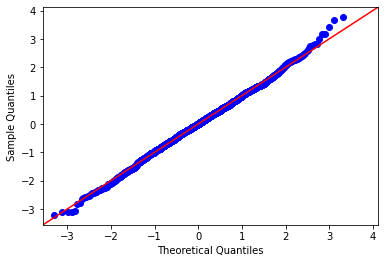

In [10]:
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

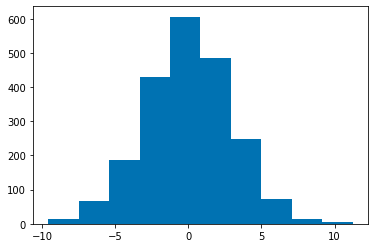

In [11]:
plt.hist(model.resid);

> **Comments:** Overall looks good, would like to drop that outlier. Both ends tip up a bit might try a transformation or two to further normalize that

# Check for Homoscedasticity

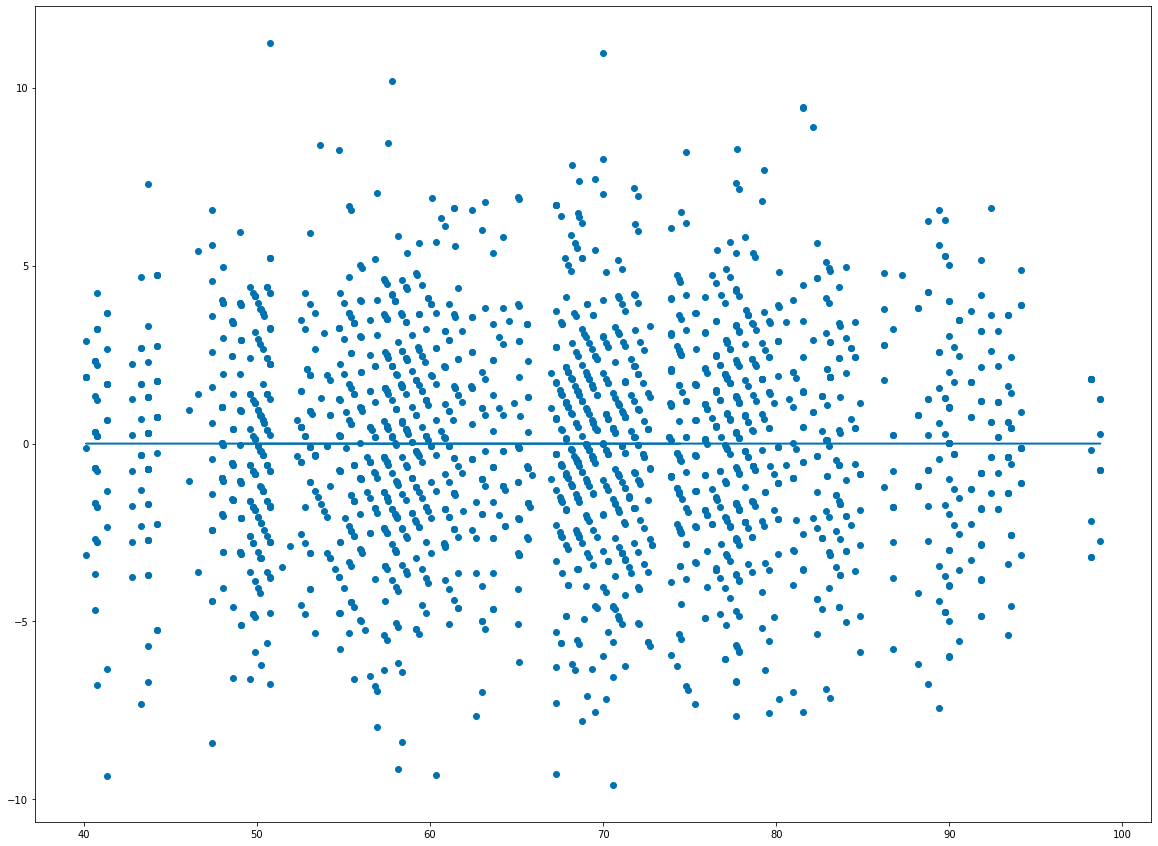

In [12]:
plt.figure(figsize=(20, 15))
plt.scatter(model.predict(df), model.resid)
plt.plot(model.predict(df), [0 for i in range(len(df))]);

> **Comments:** Overall looks good, again with the one outlier. Actually quite happy with the level of homoscedacity.

# Cross Validation

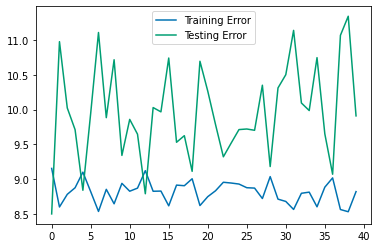

In [13]:
#Run 40 different linear regressions with different train/test splits
y= df[['posttest']]
X= predictors
linreg = LinearRegression()

num = 40
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.plot(list(range(num)), train_err, label='Training Error')
plt.plot(list(range(num)), test_err, label='Testing Error')
plt.legend();

In [14]:
reg_q = LinearRegression().fit(X, y)
print('RMSE:',np.sqrt(mean_squared_error(y, reg_q.predict(X))))
print('R**2 Score:',r2_score(y, reg_q.predict(X)))

RMSE: 2.988155389756909
R**2 Score: 0.9543359977148708


> **Comments:** The RMSE is less than half of a letter grade but the testing error is sitting way above the training error. Going to try to address that.

### Check the Cross Validation Score

In [23]:
cv5 = cross_val_score(linreg,X,y,cv=5,scoring='neg_mean_squared_error')
print((-cv5)**0.5)
print(np.mean(cv5))

[ 9.14847897 10.91155631 12.41306826 13.73704349 13.03277718]
-143.08012744039394


> **Comments:** This model, though it has a high R-squared value, is very sensitive to different training/testing data.

In [24]:
cross_val_score(linreg,X,y,cv=5,scoring='neg_mean_squared_error')

array([ -83.69466755, -119.06206121, -154.08426361, -188.70636391,
       -169.85328093])

> **Comments:** Definitely need to address overfitting.

# Model Refinement

Here I'm removing any predictors with high P values to mitigate the overfitting I'm seeing.

In [35]:
# drop = ['school_CUQAM','school_UAGPU','school_UUUQX','school_VHDHF','classroom_08N','classroom_0N7',
#         'classroom_18K','classroom_197','classroom_1Q1','classroom_1SZ',
#         'classroom_1UU','classroom_1VD','classroom_21Q','classroom_2AP',
#         'classroom_2B1','classroom_2BR','classroom_341','classroom_3D0',
#         'classroom_3XJ','classroom_4NN','classroom_5JK','classroom_5LQ',
#         'classroom_5SZ','classroom_62L','classroom_6C1','classroom_6OL',
#         'classroom_6U9','classroom_7BL','classroom_98D','classroom_9AW',
#         'classroom_A33','classroom_A93','classroom_AE1','classroom_AJ1',
#         ]
# df = df.drop(drop,axis=1)

In [34]:
#second model iteration
outcome = 'posttest'
predictors = df.drop(['posttest','pretest'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               posttest   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     420.1
Date:                Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:40:12   Log-Likelihood:                -6745.1
No. Observations:                2133   AIC:                         1.354e+04
Df Residuals:                    2107   BIC:                         1.369e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   67.3966      1.370     49.198      0.000      64.710      70.083
n_student                    0.2534      0.060      4.232      0.000       0.136       0.371
school_type_Public          -7.1901      0.752     -9.565      0.000      -8.664      -5.716
teaching_method_Standard    -5.9405      0.289    -20.557      0.000      -6.507      -5.374
gender_Male                 -0.1337      0.251     -0.532      0.595      -0.627       0.359
free_lunch                  -3.3950      0.426     -7.967      0.000      -4.231      -2.559
school_CCAAW                -1.9159      0.822     -2.330      0.020      -3.528      -0.304
school_CIMBB                 5.4497      0.966      5.641      0.000       3.555       7.344
school_DNQDD                -5.9809      0.817     -7.319      0.000      -7.584      -4.378
school_FBUMG                 8.1589      1.209      6.749      0.000       5.788      10.530
school_GJJHK                -5.5404      0.844     -6.565      0.000      -7.195      -3.885
school_GOKXL                 3.9088      1.277      3.060      0.002       1.404       6.414
school_GOOBU               -13.2421      0.764    -17.338      0.000     -14.740     -11.744
school_IDGFP                14.5451      0.913     15.932      0.000      12.755      16.335
school_KFZMY               -17.8202      1.131    -15.763      0.000     -20.037     -15.603
school_KZKKE                -8.5256      1.196     -7.128      0.000     -10.871      -6.180
school_LAYPA                12.6780      1.373      9.235      0.000       9.986      15.370
school_OJOBU                 7.6506      1.284      5.959      0.000       5.133      10.169
school_QOQTS                -1.8550      0.703     -2.637      0.008      -3.235      -0.475
school_UKPGS                16.8620      0.757     22.260      0.000      15.376      18.347
school_VKWQH                 3.4336      1.257      2.732      0.006       0.969       5.898
school_VVTVA               -16.1437      0.843    -19.154      0.000     -17.797     -14.491
school_ZMNYA                 6.0847      0.901      6.751      0.000       4.317       7.852
school_ZOWMK               -11.2401      0.825    -13.631      0.000     -12.857      -9.623
school_setting_Suburban     11.8443      1.053     11.249      0.000       9.779      13.909
school_setting_Urban         4.0633      1.139      3.568      0.000       1.830       6.297
==============================================================================
Omnibus:                        8.260   Durbin-Watson:                   0.635
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                6.694
Skew:                           0.046   Prob(JB):                       0.0352
Kurtosis:                       2.741   Cond. No.                     

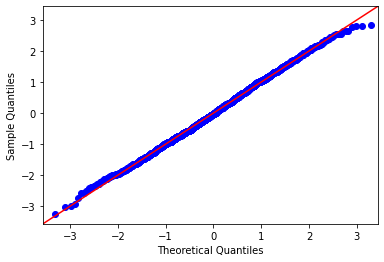

In [27]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

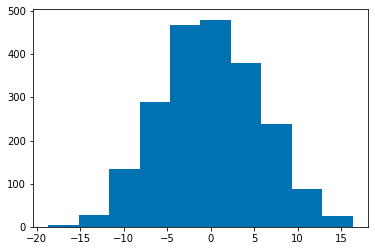

In [28]:
plt.hist(model.resid);

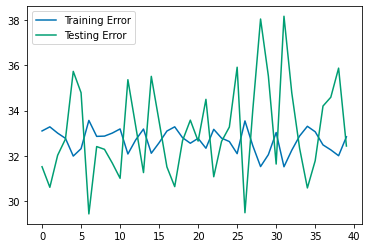

In [31]:
y= df[['posttest']]
X= predictors
linreg = LinearRegression()

num = 40
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.plot(list(range(num)), train_err, label='Training Error')
plt.plot(list(range(num)), test_err, label='Testing Error')
plt.legend();

The error in this model is much too high. 